In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import math
import itertools

In [2]:
def read_csv(f):
    d = []
    with open(f) as fid:
        reader = csv.DictReader(fid, delimiter=',', quotechar='|')
        for row in reader:
            d.append(row)
    return d

data = read_csv('Brown_annot.csv')


In [3]:
def find_sums(lines):
    sum_array = []
    keys = {k for line in lines for k in line}
    for k in keys:
        if k not in ['BROWN KAT', 'FAILI_ID']:
            try:
                result = [k, sum(float(line[k]) for line in lines)]
#                 print(result)
            except Exception as e:
                result = str(e)
            sum_array.append(result)

    return sum_array

[['FORM', 498.0], ['KEER', 433.0], ['AFEK', 238.0], ['ARG', 227.0], ['ABSTR', 110.0], ['INTER', 133.0], ['INFO', 238.0], ['SPONT', 0.0], ['AEG', 197.0], ['INST', 15.0], ['IMP', 47.0], ['SUBJ', 215.0]]


<BarContainer object of 12 artists>

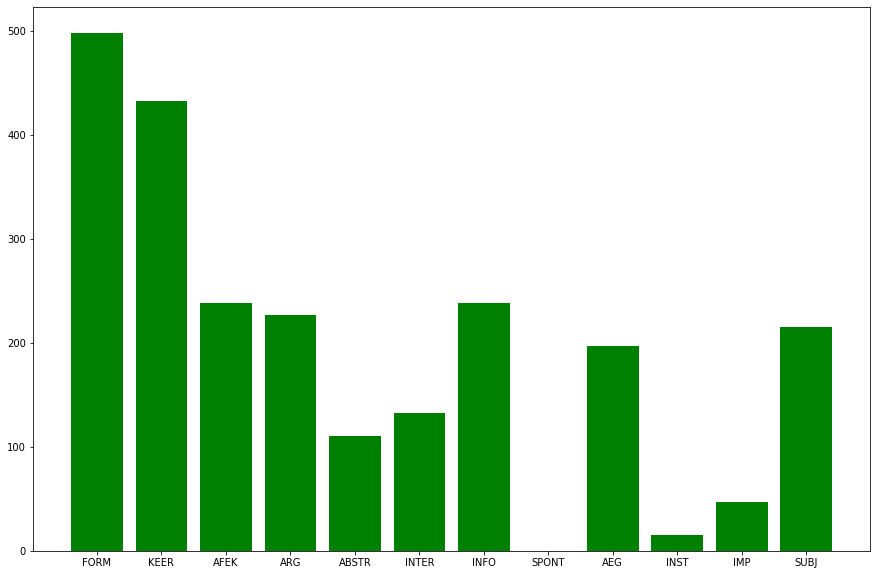

In [4]:
# find_sums(data)
dim_info = find_sums(data)
print(dim_info)

plt.rcParams["figure.figsize"] = (15, 10)
plt.bar([el[0] for el in dim_info], [el[1] for el in dim_info], color = 'green')

In [5]:
all_df = pd.read_csv('Brown_annot.csv')
all_df.drop(['SPONT'], axis=1)

,FAILI_ID,BROWN KAT,ABSTR,AFEK,INST,INFO,FORM,IMP,AEG,INTER,SUBJ,KEER,ARG
0,1,adventure,0,1,0,0,1,0,1,1,0,1,0
1,2,adventure,0,1,0,0,1,0,1,1,0,1,0
2,3,adventure,0,1,0,0,1,0,1,1,0,0,0
3,4,adventure,0,1,0,0,1,0,1,1,0,0,0
4,5,adventure,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,science_fiction,0,1,0,1,1,0,1,1,0,1,0
496,497,science_fiction,0,1,0,0,1,0,0,1,0,1,0
497,498,science_fiction,0,1,0,0,1,0,1,1,0,1,0
498,499,science_fiction,0,1,0,0,1,0,1,1,0,1,0


##### CONTINGENCY TABLES JA 'KORRELATSIOONID'

##### Tetrachoric Correlation ehk https://en.wikipedia.org/wiki/Polychoric_correlation  (Tetrachoric correlation is a special case of the polychoric correlation applicable when both observed variables are dichotomous) ja valem on siit: https://www.statology.org/tetrachoric-correlation/

-1 kuni 1
kala: 


In [6]:
dim_ls = ['IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR'] 

dimension_pairs = [list(pair) for pair in itertools.combinations(dim_ls, 2)]
# for pair in dimension_pairs:
#     print(pair)

In [7]:
def generate_confusion_matrix(dim_pair):
    return pd.crosstab(index=all_df[dim_pair[0]], columns=all_df[dim_pair[1]])

In [19]:
# def check_value(value):
#     if value == 0:
#         return 0.5
#     else:
#         return value



def calculate_tet_score(crtab):
    """
    r_tet = cos(pi/(1 + √((A*D)/(B*C)))
    
    Lähtusin artiklist "Inferential Methods for the Tetrachoric Correlation Coefficient" (2005 Price, Bonett)
    link: https://sci-hub.se/10.3102/10769986030002213)
    
    """

    a = crtab[0][0] + 0.5
    c = crtab[0][1] + 0.5
    b = crtab[1][0] + 0.5
    d = crtab[1][1] + 0.5
    
#     return math.cos(math.pi/(1 + math.sqrt(a*d/(b/c))))
    return math.cos(math.pi/(1 + math.sqrt((a*d)/(b*c))))


In [20]:
tet_table = pd.DataFrame(columns=dim_ls, index=dim_ls)
for pair in dimension_pairs:
    index = pair[0]
    column = pair[1]

    
    mtrx = generate_confusion_matrix(pair)
    score = calculate_tet_score(mtrx)

    tet_table.at[index, index] = float(1)
#     print(table.columns.get_loc(column), (pair, score))
    tet_table.at[index, column] = round(score,2)
tet_table.at[dim_ls[-1], dim_ls[-1]] = float(1)
tet_table

,IMP,AEG,KEER,INST,INTER,ARG,AFEK,INFO,SUBJ,FORM,ABSTR
IMP,1.0,-0.35,0.18,0.23,-0.91,0.17,-0.96,0.73,-0.4,-0.25,0.88
AEG,NaN,1.0,0.01,0.02,0.54,-0.57,0.34,-0.22,-0.47,-0.17,-0.59
KEER,NaN,NaN,1.0,-0.62,-0.01,0.04,0.08,0.08,-0.03,0.1,0.24
INST,NaN,NaN,NaN,1.0,-0.76,0.02,-0.57,0.4,0.06,-0.62,-0.01
INTER,NaN,NaN,NaN,NaN,1.0,-0.9,0.96,-0.91,-0.8,-0.38,-0.96
ARG,NaN,NaN,NaN,NaN,NaN,1.0,-0.64,0.43,0.72,0.51,0.54
AFEK,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.8,-0.22,-0.04,-0.73
INFO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.15,-0.04,0.49
SUBJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.11,0.16
FORM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.14


#### Cramer's V (https://samm.ut.ee/risttabelid-ja-seosekordajad): 

is used to understand the strength of the relationship between two nominal variables.

skoor vahemikus 0 kuni 1

In [10]:
# import scipy.stats as ss

# def stat(confusion_matrix):
#     chi2 = ss.chi2_contingency(confusion_matrix)
#     chi_square = chi2[0]
#     n = confusion_matrix.sum()
#     cramer =  np.sqrt(chi_square / (n*(min(confusion_matrix.shape)-1)))
#     return cramer

In [11]:
# for pair in dimension_pairs:
#     mtrx = generate_confusion_matrix(pair)
#     cramer_score = stat(mtrx.to_numpy())
#     print(f'Dimensioonid {pair}')
#     print(f'cramer v {cramer_score}')
#     print(f'========================================')

Kuna sellel andmestikul on Cramer V degree of freedom 1, siis sellisel juhul
1) väärtus > 0.1 on nõrk seos

2) väärtus > 0.3 on keskmine seos

3) väärtus > 0.5 on tugev(am) seos


Niisis on tabelis rasvaselt kõik 1), 2) ja 3)

<!-- ![tabel_2.png](attachment:tabel_2.png) -->

In [12]:
BROWN_CATS = ['adventure', 'science_fiction', 'romance', 'reviews', 'religion', 'news', 'mystery', 'lore', 'learned', 'humor', 'hobbies', 'government', 'fiction', 'editorial', 'belles_lettres']

cat_subset = all_df[['BROWN KAT', 'IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR']]

In [13]:
print(f'\n\n\nDIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:')

cat_dict = {}
for category in BROWN_CATS:
#     print(category)
    cat_dict[f'{category}'] = cat_subset.loc[cat_subset['BROWN KAT'] == category].drop(['BROWN KAT'], axis=1).sum()

#     adventure = cat_subset.loc[subset['BROWN KAT']== 'adventure'].drop(['BROWN KAT'], axis=1).sum()
cat_df = pd.DataFrame(cat_dict)
cat_df




DIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:


,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,0,0,0,0,0,0,0,1,36,0,0,9,0,0,1
AEG,21,3,15,2,5,22,21,17,14,2,7,15,20,4,29
KEER,23,6,24,16,12,35,19,43,73,8,26,22,26,26,74
INST,0,0,0,0,0,0,0,2,2,0,10,1,0,0,0
INTER,28,6,26,0,0,1,23,3,1,5,0,0,26,5,9
ARG,0,0,0,11,13,20,0,26,58,3,19,16,0,23,38
AFEK,29,6,29,12,5,7,24,17,12,8,12,2,29,14,32
INFO,0,1,0,12,9,37,0,30,60,1,25,24,0,16,23
SUBJ,1,0,0,17,11,19,0,25,36,4,21,11,0,24,46
FORM,29,6,29,17,17,44,24,48,80,9,36,30,28,27,74


In [14]:
texts_per_category = cat_subset['BROWN KAT'].value_counts()
print(texts_per_category)

learned            80
belles_lettres     75
lore               48
news               44
hobbies            36
government         30
adventure          29
fiction            29
romance            29
editorial          27
mystery            24
reviews            17
religion           17
humor               9
science_fiction     6
Name: BROWN KAT, dtype: int64


In [15]:
def calculate_tet_score(a, b, c, d):
    a = a + 0.5
    c = c + 0.5
    b = b + 0.5
    d = d + 0.5
    return round(math.cos(math.pi/(1 + math.sqrt((a*d)/(b*c)))), 3)

In [16]:
def get_dimension_info(row):
    dim_name = row.name
#     print(dim_name)
    dim_texts_total = row.sum()
    for cat_nr in zip(row.index, row.values):
        category = cat_nr[0]
        annotated_texts_per_row_category = cat_nr[1]
#         print(category, annotated_texts_per_row_category)
        
        d = annotated_texts_per_row_category
        c = dim_texts_total - d
        b = texts_per_category[category] - d
#         a = TOTAL_TEXT_NR - dim_texts_total  - c
        a = 500 - (b + d) - c

        
        tet_score = calculate_tet_score(a, b, c, d)
#         print(f'a: {a},b: {b},c: {c},d: {d}')
#         print(tet_score)
        category_dim_correlation_df.at[dim_name, category] = tet_score
        

In [17]:
category_dim_correlation_df = pd.DataFrame(columns=cat_df.columns, index=dim_ls)

for i in range(len(cat_df.index)): 
    get_dimension_info(cat_df.iloc[i])


category_dim_correlation_df

,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,-0.637,-0.126,-0.637,-0.485,-0.485,-0.735,-0.587,-0.469,0.882,-0.272,-0.69,0.563,-0.637,-0.618,-0.617
AEG,0.517,0.169,0.205,-0.515,-0.158,0.184,0.737,-0.069,-0.463,-0.262,-0.377,0.178,0.466,-0.468,-0.012
KEER,-0.237,0.276,-0.15,0.217,-0.405,-0.232,-0.242,0.092,0.193,-0.048,-0.386,-0.362,0.071,0.395,0.711
INST,-0.267,0.329,-0.267,-0.058,-0.058,-0.422,-0.193,0.217,-0.015,0.187,0.894,0.183,-0.267,-0.239,-0.6
INTER,0.941,0.904,0.869,-0.78,-0.78,-0.76,0.928,-0.579,-0.863,0.455,-0.883,-0.862,0.869,-0.163,-0.396
ARG,-0.931,-0.748,-0.931,0.299,0.482,0.002,-0.918,0.15,0.489,-0.173,0.123,0.13,-0.931,0.647,0.097
AFEK,0.947,0.796,0.947,0.358,-0.287,-0.572,0.936,-0.211,-0.629,0.631,-0.24,-0.755,0.947,0.069,-0.09
INFO,-0.936,-0.448,-0.936,0.358,0.084,0.627,-0.924,0.254,0.501,-0.58,0.362,0.535,-0.936,0.188,-0.315
SUBJ,-0.807,-0.729,-0.925,0.926,0.335,0.005,-0.91,0.157,0.039,0.032,0.253,-0.103,-0.925,0.735,0.33
FORM,-0.428,-0.801,-0.428,-0.591,-0.591,-0.274,-0.49,-0.239,-0.015,-0.734,-0.351,-0.416,-0.814,-0.452,-0.6
